<a href="https://colab.research.google.com/github/sanu1230/Personal_Projects/blob/master/EDA_Bakery_sales_dataset_2006_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bakery sales dataset 2006-2019

**About Data**

*Atributes*
- Date - All dates starring from 01-01-2006 to 31-12-2019
- weekday - weekday names
- cakes - number of cakes sold on that day
- pies - number of pies sold on that day
- cookies - number of cookies sold on that day
- smoothies - number of smoothies sold on that day
- coffee - number of coffee sold on that day
- promotion - where there was promotion/offer on that day, if yes=promotion & no=none


## Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Data

In [ ]:
df = pd.read_csv('/content/bakery_sales.csv')
df.head()

,Unnamed: 0,Date,weekday,cakes,pies,cookies,smoothies,coffee,promotion
0,0,2006-01-01,Sunday,45,41,50,19,73,promotion
1,1,2006-01-02,Monday,48,18,18,44,5,none
2,2,2006-01-03,Tuesday,1,40,99,41,8,none
3,3,2006-01-04,Wednesday,4,10,15,58,95,none
4,4,2006-01-05,Thursday,4,44,67,71,20,promotion


In [ ]:
del df['Unnamed: 0']

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

## Exploratory Data Analysis

In [ ]:
cols = ['cakes', 'pies', 'cookies', 'smoothies', 'coffee']

## Most Sold Food Item

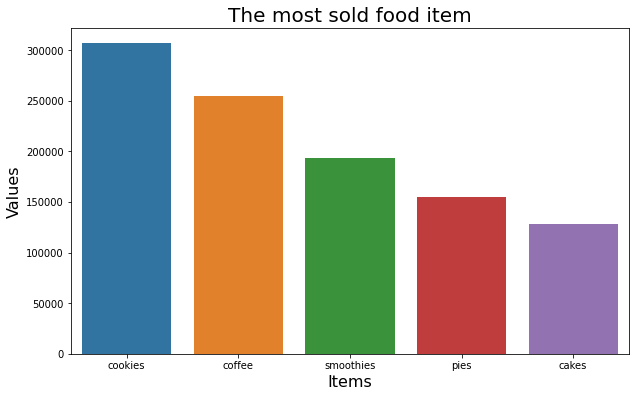

In [ ]:
col_sum = df[cols].sum(axis=0).sort_values(ascending=False)

df1 = pd.DataFrame(col_sum, columns=['values'])
df1.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='index', y='values')
plt.xlabel('Items', fontsize=16)
plt.ylabel('Values', fontsize=16)
plt.title('The most sold food item', fontsize=20)
plt.show()


**Obervation:**
- Coffee is the most sold item as per our dataset

## How do promotions affect sales of items?

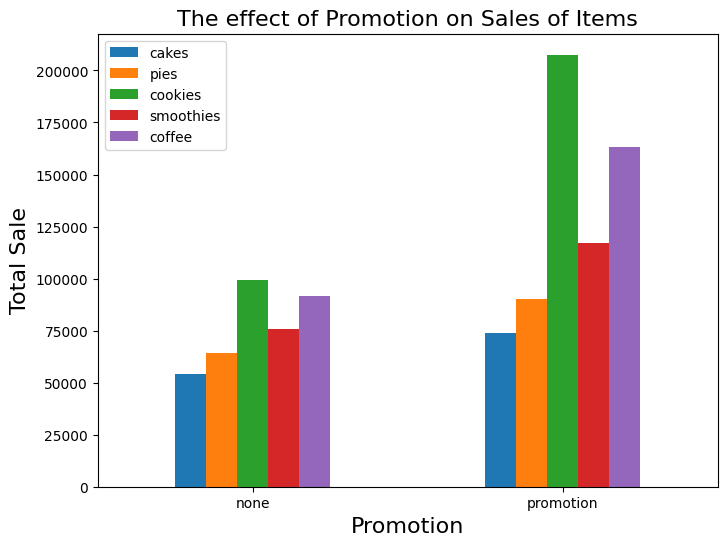

In [ ]:
df1= df.groupby(['promotion'])[cols].agg('sum')

f, ax = plt.subplots(figsize=(8, 6), dpi=100)
df1.plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation='horizontal')
plt.xlabel('Promotion', fontsize=16)
plt.ylabel('Total Sale', fontsize=16)
plt.title('The effect of Promotion on Sales of Items', fontsize=16)
plt.show()

**Observation:**
- We can see the effect of Offers/promotion on the sale of items, the sale increases. Specially we can see a drastic increase in the sale of Cookies and Coffee.

## Differentiation between weekend and weekdays sales

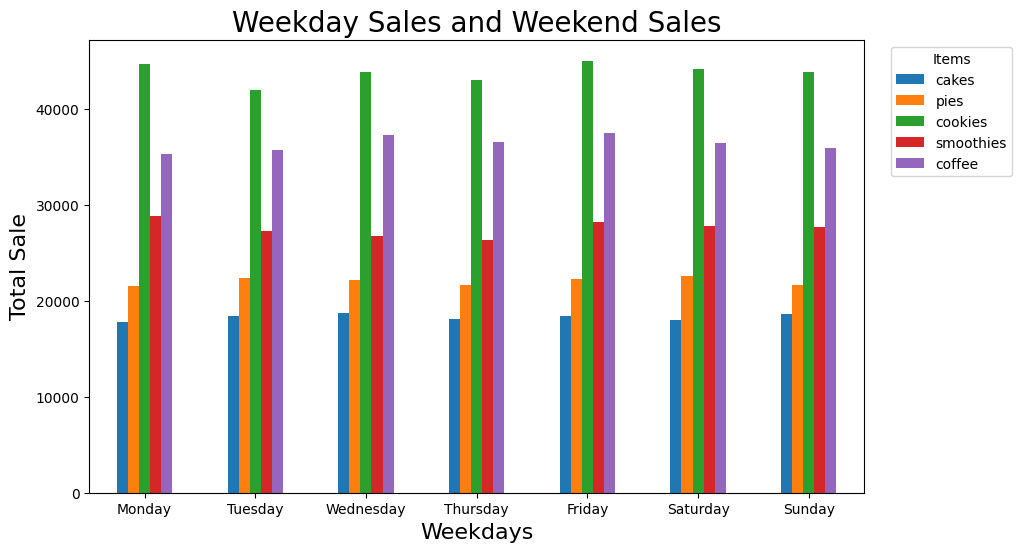

In [ ]:
wk_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df2 = df.groupby('weekday')[cols].agg('sum').reindex(labels=wk_order)

f, ax = plt.subplots(figsize=(10, 6), dpi=100)
df2.plot(kind='bar', stacked=False, ax=ax, )
plt.xticks(rotation='horizontal')
plt.xlabel('Weekdays', fontsize=16)
plt.ylabel('Total Sale', fontsize=16)
plt.title('Weekday Sales and Weekend Sales', fontsize=20)
plt.legend(title='Items', bbox_to_anchor=(1.2, 1))
plt.show()


**Observsation:**
- From the above graph we can see that there is not much difference between weekday sales and weekend sale, on an avg. they are on the same level.
- We also see that the lowest overall sales is on Tuesday and the highest sale is on Friday.

## Has the sales improved over the span of last two years

In [ ]:
df['year'] = df['Date'].dt.strftime('%Y')

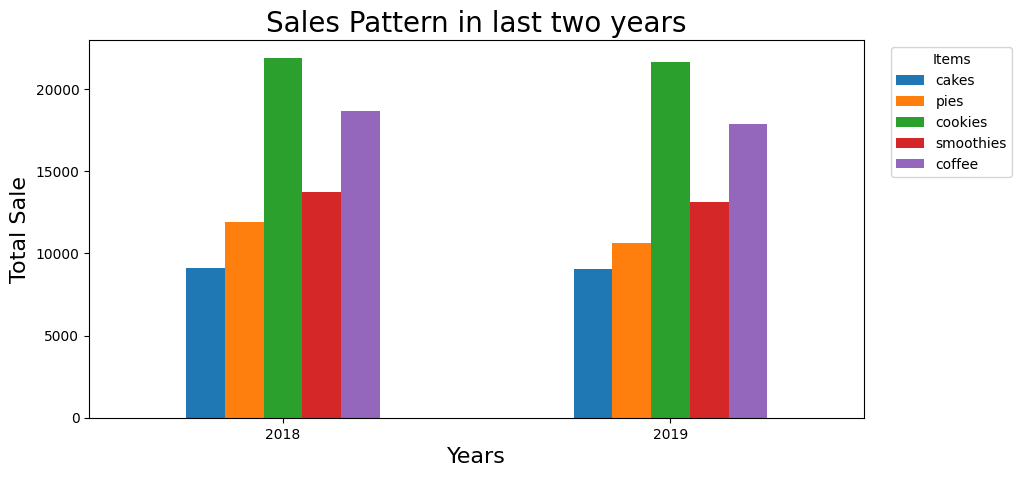

In [ ]:
df3 = df.groupby(['year'], as_index=True)[cols].agg('sum')

f, ax = plt.subplots(figsize=(10, 5), dpi=100)
df3[-2:].plot(kind='bar', stacked=False, ax=ax)
plt.xticks(rotation='horizontal')
plt.xlabel('Years', fontsize=16)
plt.ylabel('Total Sale', fontsize=16)
plt.title('Sales Pattern in last two years', fontsize=20)
plt.legend(title='Items', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


**Observation:**
- The Over sales in the last two years has not improved much, as per the graph  above, we see that infact for few items the sales has reduced in 2019

## Analyzing monthly sales to understand buying pattern.

In [ ]:
df['month'] = df['Date'].dt.strftime('%b')


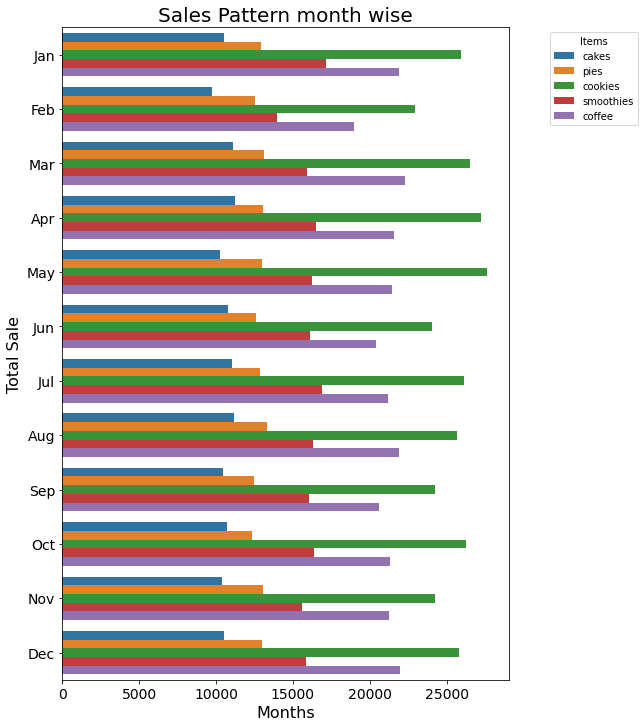

In [ ]:
df4 = df.groupby(['month'], as_index=False)[cols].agg('sum')
df4 = df4.reindex(index=[4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2])


plt.subplots(figsize=(8, 12))
tidy = df4.melt(id_vars='month').rename(columns=str.title)
sns.barplot(data=tidy, y='Month', x='Value', hue='Variable')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Months', fontsize=16)
plt.ylabel('Total Sale', fontsize=16)
plt.title('Sales Pattern month wise', fontsize=20)
plt.legend(title='Items', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

**Observation:**
- From the graph above we see that there was a dip in overall sales in the month of Feb compared to April and it has improved a bit in June.
- Item wise we see that the sales for few items has consistantly decresed in sales(Ex:-coffee), where as we can see there is a consitant increase in the sales(Ex:- Pies)